<a href="https://www.kaggle.com/code/mohammmedala/do-discounts-work-dont-be-suspicious?scriptVersionId=138038743" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [6]:
df = pd.read_excel('../input/united-state-superstore-sales/Sample - Superstore.xls')

# Checking data

In [7]:
df.shape

(9994, 21)

In [8]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
df["Postal Code"] = df["Postal Code"].astype(object)

In [10]:
df = df.rename(columns = lambda x:x.replace(" ", "_").lower())
df = df.rename(columns = {'sub-category':'sub_category'})
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [11]:
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Main Idea
**So, My question is "*Is discount lead to more profit or not?*". lets find out XD.

In [13]:
df.head(4)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [14]:
df.describe()

,row_id,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
px.scatter(df, x = "profit", y = "discount")

So, it appears that increase in the amount of discount leads to negative profits 

In [16]:
df.groupby("discount").customer_id.count()

discount
0.00    4798
0.10      94
0.15      52
0.20    3657
0.30     227
0.32      27
0.40     206
0.45      11
0.50      66
0.60     138
0.70     418
0.80     300
Name: customer_id, dtype: int64

most type of discount is 20 percent off

In [17]:
px.bar(df.groupby("discount").row_id.count())

In [18]:
px.bar(df.query("discount != 0.00"), x = "category", y = "profit")

Discounts for furniture and office supplies have alot of negative profits orders more than - 40k.

In [19]:
px.bar(df.query("discount != 0.00").groupby("category").profit.sum())

Despite discounts for techology have some non-profit orders, its total profit is the only category above zero with real profit. discounts for furinture is the worst. 

In [20]:
px.bar(df.query(" discount != 0.00 and category == 'Furniture'").groupby(["sub_category"]).row_id.count())

apparently most discounts in furniture category are for chairs and furnishings 

In [21]:
px.bar(df.query(" discount != 0.00 and category == 'Furniture'").groupby(["sub_category"]).profit.sum())

and all these discounts are making the superstore lose money except for chairs discount which show some profit of less than 5 k

In [22]:
px.scatter(df.query(" discount != 0.00 and category == 'Furniture'"), x = "order_date", y = "sales", color = "sub_category" ,color_discrete_sequence=px.colors.qualitative.Vivid)

and it appears that sales of these discounted items do not increase regularly,chairs have highest points over time

In [23]:
px.bar(df.query(" discount != 0.00 and category == 'Furniture'").groupby(["region"]).profit.sum()) 


and the loss is not specific to a particular region, all regions show loss of profit to these discounts 

In [24]:
all_states = df.query(" discount != 0.00 and category == 'Furniture'").groupby(["state"]).profit.sum() 
all_states.shape[0]

25

In [25]:
(all_states>0).sum()

6

and only 6 states out of 25 that have positive profit to these discounts for furniture

In [26]:
df.query(" discount != 0.00 and category == 'Furniture'").groupby(["segment"]).profit.sum() 


segment
Consumer      -21804.9336
Corporate     -11623.7845
Home Office    -6253.0855
Name: profit, dtype: float64

In [27]:
px.histogram(df.query(" discount != 0.00 and category == 'Furniture'"), x = "segment",y = "profit", color = "sub_category" , barmode = "group") 


even for segment, the same story was expected 

lets now see how discounts in technology work

In [28]:
px.bar(df.query(" discount != 0.00 and category == 'Technology'").groupby(["sub_category"]).customer_id.count())

Phones and Accessories have the most number of discounts

In [29]:
px.bar(df.query(" discount != 0.00 and category == 'Technology'").groupby(["sub_category"]).profit.sum())

All discounts show real profits except for machines (suspecious)

In [30]:
px.scatter(df.query(" discount != 0.00 and category == 'Technology'"), x = "order_date", y = "sales", color = "sub_category",color_discrete_sequence=px.colors.qualitative.Vivid)

In [31]:
px.histogram(df.query(" discount != 0.00 and category == 'Technology'"), x = "segment",y = "profit", color = "sub_category" , barmode = "group") 


In [32]:
px.bar(df.query(" discount != 0.00 and category == 'Technology'").groupby(["region"]).profit.sum()) 


However this time, discounts for technolog do not work in every region. with the west with the best profit over 15k. and the east with huge loss of 10k

In [33]:
px.histogram(df.query(" discount != 0.00 and category == 'Technology' and region in ('East' , 'South')"), x = "segment",y = "profit", color = "sub_category" , barmode = "group") 


if we look closely at the two regions with the loss ( the east and the south ) we can see that loss was due to machines. (suspecious)

In [34]:
px.bar(df.query("sub_category == 'Machines'").groupby(["discount"]).quantity.sum())

In [35]:
px.bar(df.query("sub_category == 'Machines'").groupby(["discount"]).profit.sum())

more than 80 machines were sold with 70 percent discount, which lead to almost 20k loss of profits

In [36]:
px.bar(df.query("sub_category == 'Machines' and discount == 0.7 ").groupby(["region"]).quantity.sum())

OBVIOUSLY the EAST sold 60 machines of these 80. but where the south and WTH the west are u doing here

In [37]:
px.histogram(df.query(" discount != 0.00 and category == 'Technology' and region =='South'"), x = "segment",y = "profit", color = "sub_category" , barmode = "group") 


<AxesSubplot:xlabel='discount'>

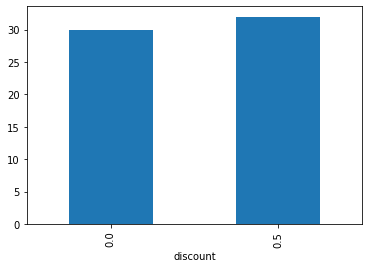

In [38]:
df.query("sub_category == 'Machines' and region == 'South' ").groupby(["discount"]).quantity.sum().plot(kind = "bar")

But when we look at the south profits only, we stil see that machines made them lose so much, that is because they sold more than 30 machine with 50 percent discount

In [39]:
px.histogram(df.query(" discount != 0.00 and category == 'Technology' and region =='West'"), x = "segment",y = "profit", color = "sub_category" , barmode = "group") 


For the west, the story were different as all of their discounts for technology were successfull except for machines in the home office segment ( whihc were sold at 70 percent off btw) but that loss did not affect total profit

In [40]:
df.query("sub_category == 'Machines' and region == 'West' and segment == 'Home Office' ").groupby(["discount"]).profit.sum()

discount
0.2    1045.6666
0.7   -4818.2480
Name: profit, dtype: float64

In [41]:
tech_sales_before = df.query("discount == 0.00  and category == 'Technology'").sales.sum()
tech_sales_after = df.query("discount != 0.00 and category == 'Technology'").sales.sum()
tech_sales_before < tech_sales_after

True

In [42]:
office_sales_before = df.query("discount == 0.00and category == 'Office Supplies'").sales.sum()
office_sales_after = df.query("discount != 0.00 and profit > 0 and category == 'Office Suplies'").sales.sum()
office_sales_before < office_sales_after

False

In [43]:
furn_sales_before = df.query("discount == 0.00 and category == 'Furniture'").sales.sum()
furn_sales_after = df.query("discount != 0.00 and profit > 0 and category == 'Furniture'").sales.sum()
furn_sales_before < furn_sales_after

False

Number of sales only increased for technology after discounts.

In [44]:
tech_profit_before = df.query("discount == 0.00  and category == 'Technology'").profit.sum()
tech_profit_after = df.query("discount != 0.00 and category == 'Technology'").profit.sum()
tech_profit_before < tech_profit_after

False

In [45]:
df.query("discount > 0.4  and category == 'Technology'").row_id.count() / df.query("discount != 0.00  and category == 'Technology'").row_id.count() * 100


3.451676528599606

However, profit after discount was less than withno discounts, with more than 3 percent of these discount was more than 40 percent off

In [46]:
off_profit_before = df.query("discount == 0.00  and category == 'Office Supplies'").profit.sum()
off_profit_after = df.query("discount != 0.00 and category == 'Office Supplies'").profit.sum()
off_profit_before < off_profit_after

False

In [47]:
df.query("discount > 0.4  and category == 'Office Supplies'").row_id.count() / df.query("discount != 0.00  and category == 'Office Supplies'").row_id.count() * 100


23.47255781843286

In [48]:
furn_profit_before = df.query("discount == 0.00  and category == 'Furniture'").profit.sum()
furn_profit_after = df.query("discount != 0.00 and category == 'Furniture'").profit.sum()
furn_profit_before < furn_profit_after

False

In [49]:
df.query("discount > 0.4  and category == 'Furniture'").row_id.count() / df.query("discount != 0.00  and category == 'Furniture'").row_id.count() * 100


16.964980544747082

# Finally :
* Overall discounts do not lead to more profits.
* They might lead to more sales as in Technologies but their total profit was not a success.
* Most importantly, they lead to so much loss as for Furniture and office supplies, with no gain in profit at all.
* the loss was not specific to a segmnet or a region.